In [1]:
import numpy as np
import scipy
from scipy.linalg import  pinv,det
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

def mean_normalization(x):
    return (x-np.mean(x,axis=1).reshape(x.shape[0],1))/np.std(x,axis=1).reshape(x.shape[0],1),np.mean(x,axis=1).reshape(x.shape[0],1),np.std(x,axis=1).reshape(x.shape[0],1)


datax = np.genfromtxt('q4x.dat',encoding=None,dtype=None)
datax = [list(item) for item in datax]
datax = np.array(datax,dtype = 'float64')
x = np.zeros(datax.shape)
x[:] = datax[:]
x = x.T
datax = datax.T
datax,norm_mean,norm_std = mean_normalization(datax)
print(datax.shape)

datay = np.genfromtxt('q4y.dat',encoding = None,names = '',dtype=None)
datay = [list(item) for item in datay]
datay = np.array(datay)
y = np.zeros(datay.shape)
y[(np.where(datay=='Alaska'))[0]] = 1
datay = datay.T
y = y.T
print(datay.shape)

(2, 100)
(1, 100)


In [2]:
phi = len((np.where(datay=='Alaska'))[0])/len(datay)

mu0 = np.sum(datax[:,(np.where(datay=='Canada'))[1]],axis = 1).reshape((datax.shape[0],1)) / len((np.where(datay=='Canada'))[1])
print(mu0)

mu1 = np.sum(datax[:,(np.where(datay=='Alaska'))[1]],axis = 1).reshape((datax.shape[0],1)) / len((np.where(datay=='Alaska'))[1])
print(mu1)

diff = datax
diff[:,(np.where(datay=='Canada'))[1]] = diff[:,(np.where(datay=='Canada'))[1]] - mu0
diff[:,(np.where(datay=='Alaska'))[1]] = diff[:,(np.where(datay=='Alaska'))[1]] - mu1
# print(diff)

sigma = np.dot(diff,diff.T) / diff.shape[1]

print(sigma)

[[ 0.75529433]
 [-0.68509431]]
[[-0.75529433]
 [ 0.68509431]]
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


## Linear

[[ 1.69462726 -1.219292  ]]


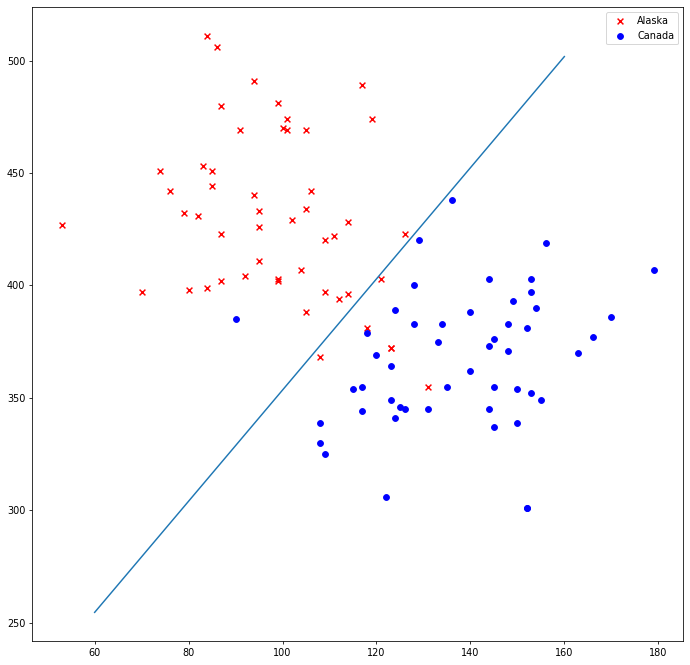

In [3]:
from cmath import log


intercept =  0.5*(np.dot(mu0.T,np.dot(pinv(sigma),mu0))-np.dot(mu1.T,np.dot(pinv(sigma),mu1))) + np.real((log(phi/(1-phi))))

coeff1 = np.dot(pinv(sigma),(mu0-mu1))/2
coeff2 = np.dot((mu0-mu1).T,pinv(sigma))/2

coeff = coeff1 + coeff2.T
print(coeff2)

plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize']=[12,12]
plt.scatter(x[0,(np.where(y==1))[1]],x[1,(np.where(y==1))[1]],c = 'red',marker = 'x',label  = 'Alaska')
plt.scatter(x[0,(np.where(y==0))[1]],x[1,(np.where(y==0))[1]],c = 'blue',label = 'Canada')

x_axis = np.linspace(60,160,10)
x_norm = (x_axis-norm_mean[0])/norm_std[0]
y_norm = (intercept - coeff[0,0]*x_norm)/coeff[1,0]
y_axis = y_norm*norm_std[1] + norm_mean[1]

plt.plot(x_axis,y_axis.T)
plt.legend()

## Quadratic

In [2]:
datax[:] = x[:]
datax,norm_mean,norm_std = mean_normalization(datax)
phi = len((np.where(datay=='Alaska'))[0])/len(datay[0])
print(phi)

mu0 = np.sum(datax[:,(np.where(datay=='Canada'))[1]],axis = 1).reshape((datax.shape[0],1)) / len((np.where(datay=='Canada'))[1])
print(mu0)

mu1 = np.sum(datax[:,(np.where(datay=='Alaska'))[1]],axis = 1).reshape((datax.shape[0],1)) / len((np.where(datay=='Alaska'))[1])
print(mu1)

diff = datax
diff[:,(np.where(datay=='Canada'))[1]] = diff[:,(np.where(datay=='Canada'))[1]] - mu0
diff[:,(np.where(datay=='Alaska'))[1]] = diff[:,(np.where(datay=='Alaska'))[1]] - mu1
# print(diff)
sigma0 = np.dot(diff[:,(np.where(datay=='Canada'))[1]],diff[:,(np.where(datay=='Canada'))[1]].T) / len((np.where(datay=='Canada'))[1])
sigma1 = np.dot(diff[:,(np.where(datay=='Alaska'))[1]],diff[:,(np.where(datay=='Alaska'))[1]].T) / len((np.where(datay=='Alaska'))[1])

print(sigma0)
print(sigma1)

datax[:] = x[:]


0.5
[[ 0.75529433]
 [-0.68509431]]
[[-0.75529433]
 [ 0.68509431]]
[[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]


-23.039159395805584


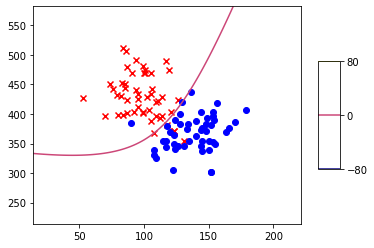

In [9]:
from matplotlib import cm
x1 = (np.linspace(-4,4,100)) #- norm_mean[0])/norm_std[0]
x2 = (np.linspace(-4,4,100)) #- norm_mean[1])/norm_std[1]
x1, x2 = np.meshgrid(x1, x2)
z = np.zeros_like(x1)
sigma0inv = pinv(sigma0)
sigma1inv = pinv(sigma1)
intercept = (np.log(phi/(1-phi))) - 0.5 * (np.log(det(sigma1)/det(sigma0)))
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        x = np.array([x1[i,j], x2[i,j]]).reshape((2,1))
        z[i,j] = intercept - 0.5 * np.dot((x-mu1).T,np.dot(sigma1inv,x-mu1)) + 0.5* np.dot((x-mu0).T,np.dot(sigma0inv,x-mu0))

fig,ax = plt.subplots()
ax.scatter(datax[0,(np.where(y==1))[1]],datax[1,(np.where(y==1))[1]],c = 'red',marker = 'x',label  = 'Alaska')
ax.scatter(datax[0,(np.where(y==0))[1]],datax[1,(np.where(y==0))[1]],c = 'blue',label = 'Canada')
# z = abs(z)
print(np.min(z))
cont = ax.contour(x1 * norm_std[0] + norm_mean[0],x2 * norm_std[1] + norm_mean[1],z,0,cmap = cm.plasma)
fig.colorbar(cont, shrink=0.5, aspect=5)